<a href="https://colab.research.google.com/github/Bigote93/RobotBitcoin/blob/main/RobotBitcoin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Robot Bitcoin

Installar librerias faltantes

In [ ]:
pip install mplfinance
pip install datetime
pip install calendar
pip install pandas 
pip install yfinance
pip install matplotlib.pyplot

In [43]:
#Importar librerias

from datetime import date
import calendar
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import mplfinance as mpf

Variable diccionario temporalidad valida

In [44]:
_FormatoTiempo = {
    'Tiempo': ['5 minutos','15 minutos','30 minutos','1 hora','1 dia','5 dias','1 Semana'],
    'Abreviatura':['5m','15m','30m','1h','1d','5d','1wk']
}
rangos = pd.DataFrame(_FormatoTiempo, index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])


Metodo para forzar valor numerico y opciones validas

In [45]:
#(1) Metodo forzar valor numerico
def force_number(mensaje):
    while True:
        try:
            opcion = int(input(mensaje))
            break
        except ValueError:
            print("Debe ingresar valor numerico")
    return opcion

# (2) METODO DE FORZAR OPCIONES A ELEGIR
def force_opcion_menus(valor, lista_valores):
    repetir = True
    while repetir:
        if valor in lista_valores:
            repetir = False
        else:
            valor = force_number('No valido. Ingrese nuevamente: ')
    return valor

Extraccion de precios historicos BitCoin

In [46]:
def importar_base_bitcoin(dias,rango):

  data = yf.download("BTC-USD", period=f"{dias}d", interval=f"{rango}")

  df_bitcoin = pd.DataFrame(data)

  return df_bitcoin

Metodo solicitud informacion por intervalo 

In [47]:
def intervalo_solicitud():

    print(' Margen de informacion '.center(100,'*'))
    print(f"Hoy nos encontramos a : {date.today().day} de {calendar.month_name[date.today().month]} del {date.today().year}".center(100))


    '''
        Si se incorporan registros superiores a los 60 dias de registros del objeto "download" incorporar estas variables de control: 
        
            anio_origen = force_opcion_menus(force_number("Ingrese año: "),list(range(2014, date.today().year +1)))
            mes_origen = force_opcion_menus(force_number("Ingrese numero del mes: "), list(range(1, 13, 1)))
            dia_origen = force_opcion_menus(force_number("Ingrese dia del mes: "), list(range(1,calendar.monthrange(anio_origen,mes_origen)[1]+1) ))
    
    '''

    mes_origen = force_opcion_menus(force_number(">>> Ingrese numero del mes: "), list(range(1,date.today().month + 1)))
    dia_origen = force_opcion_menus(force_number(">>> Ingrese dia del mes:  "), list(range(1,calendar.monthrange(date.today().year, mes_origen)[1]+1)))

    origen_analisis = date(date.today().year, mes_origen, dia_origen)

    print("Ahora debe elegir el rango de eventos".center(100))


    ciclo = True
    valor = None

    while ciclo:
        print(rangos)
        rango_seleccion = input("Selccione el rango tiempo: ")
        if rango_seleccion in rangos.index:
            valor = rangos.loc[rango_seleccion][1]
            ciclo = False
        else:
            print("Opcion no valida. Ingrese nuevamente")

    #Seleccion de opcion

    margen = date.today() - origen_analisis

    return [margen.days, valor]

Funciones de medias moviles y creacion de arreglos de picos altos y minimos

In [50]:
#Calcular medias moviles al valor Open
def calcular_media_movil_tabla(tabla, columna, ventana):
    mediamovil = tabla[columna].rolling(window=ventana).mean()
    return mediamovil


#Determinar los picos minimos de Open por ventana de 10 fechas
def minimosPorVentana(dataframe):

    minimos = []
    limiteinferior = 10

    dataframe_analisis = dataframe.iloc[limiteinferior:]

    while len(dataframe_analisis) > 20:

        coordenada_maximo = [
            dataframe_analisis['Open'].idxmin(),
            dataframe_analisis['Open'][dataframe_analisis['Open'].idxmin()]
        ]

        minimos.append(coordenada_maximo)

        limiteinferior += 10

        dataframe_analisis = dataframe_analisis.iloc[limiteinferior:]

    return minimos

#Determinar los picos maximo de Open por ventana de 10 fechas
def maximosPorVentana(dataframe):

    maximos = []
    limiteinferior = 10

    dataframe_analisis = dataframe.iloc[limiteinferior:]

    while len(dataframe_analisis) > 20:

        coordenada_maximo = [
            dataframe_analisis['Open'].idxmax(),
            dataframe_analisis['Open'][dataframe_analisis['Open'].idxmax()]
        ]

        maximos.append(coordenada_maximo)

        limiteinferior += 10

        dataframe_analisis = dataframe_analisis.iloc[limiteinferior:]

    return maximos



Obtencion de datos Bitcoin

In [51]:
inicializador = intervalo_solicitud()

dataframe_x = importar_base_bitcoin(inicializador[0], inicializador[1])

************************************** Margen de informacion ***************************************
                             Hoy nos encontramos a : 31 de May del 2023                             
>>> Ingrese numero del mes: 4
>>> Ingrese dia del mes:  1
                               Ahora debe elegir el rango de eventos                                
       Tiempo Abreviatura
a   5 minutos          5m
b  15 minutos         15m
c  30 minutos         30m
d      1 hora          1h
e       1 dia          1d
f      5 dias          5d
g    1 Semana         1wk
Selccione el rango tiempo: d
[*********************100%***********************]  1 of 1 completed


Eliminar columna variable ajustado

In [52]:
dataframe_x = dataframe_x.drop('Adj Close', axis = 1)

Reeordenar las columnas del dataframe

In [53]:
orden_columnas = ['Open', 'Close', 'High', 'Low', 'Volume']

dataframe_x = dataframe_x.reindex(columns = orden_columnas)


Crear excel del dataframe

In [54]:
dataframe_x.to_excel(
    'DocumentosExcel/datosexcel.xlsx',
    sheet_name=f"BitCoin {inicializador[1]}",
    index = False
)

Grafico de banderas 

/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:83: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


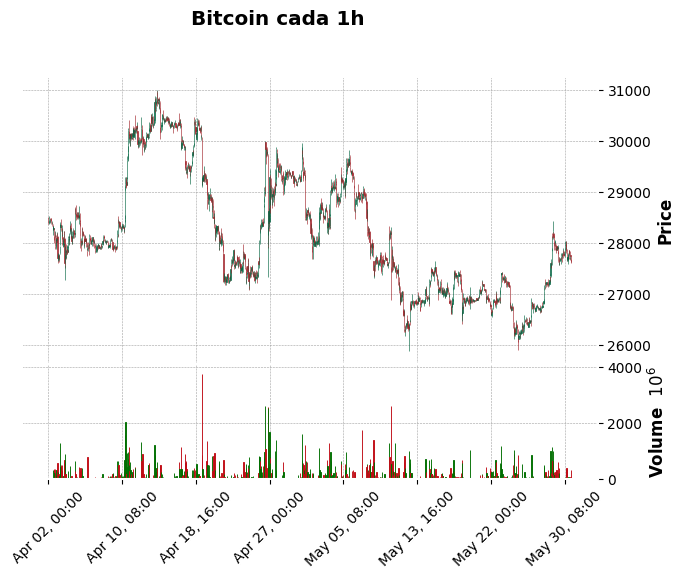

In [55]:
ruta_banderas = f'Graficos/bitcoin{date.today()}_T{inicializador[1]}.png'

mpf.plot(
    dataframe_x,
    type = 'candle',
    style = 'charles',
    title = f'Bitcoin cada {inicializador[1]}',
    volume=True,
    #Opcional para almacenar:  savefig = ruta_banderas
)

plt.show()

Generamos un dataframe con medias moviles para cada columna del dataframe original

In [56]:

openMedia = calcular_media_movil_tabla(dataframe_x,'Open', 10)
closeMedia = calcular_media_movil_tabla(dataframe_x, 'Close', 10)
highMedia = calcular_media_movil_tabla(dataframe_x, 'High', 10)
lowMedia = calcular_media_movil_tabla(dataframe_x,'Low',10)


dataframeMedia = pd.DataFrame({
    'Open': openMedia,
    'Close': closeMedia,
    'High': highMedia,
    'Low': lowMedia
})

Eliminamos los primeros 10 registros que se utilizan de ventana inicial 

In [57]:
dataframeMedia = dataframeMedia.drop(dataframe_x.index[:10])

Creacion de excel de dataframe de medias moviles

In [58]:

dataframeMedia.to_excel(
    'DocumentosExcel/dataframeMedia.xlsx',
    sheet_name=f'Medias moviles Bitcoin{inicializador[1]}',
    index=False
)

Graficos de banderas de medias moviles

/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:83: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


(<Figure size 800x575 with 2 Axes>, [<Axes: ylabel='Price'>, <Axes: >])

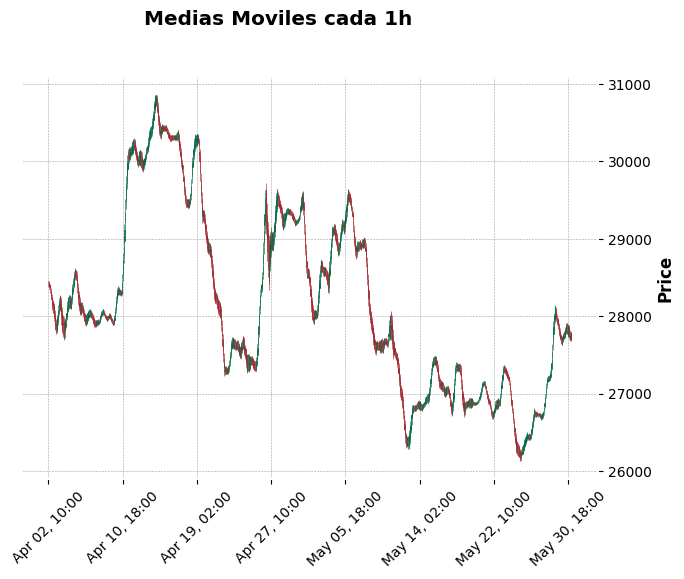

In [59]:

ruta_banderasmedia = f'Graficos/MediasMovilesBitcoin{date.today()}_T{inicializador[1]}.png'

mpf.plot(
    dataframeMedia,
    type = 'candle',
    style = 'charles',
    title = f'Medias Moviles cada {inicializador[1]}',
    returnfig=True,
    #Opcional para almacenar: savefig = ruta_banderasmedia

)

Graficos de picos minimos y maximos

(25000.0, 31015.013535156253)

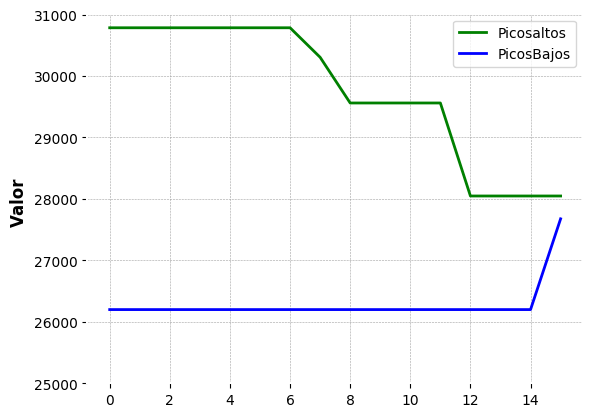

In [60]:

y = [item[1] for item in  maximosPorVentana(dataframeMedia)]
y2 = [item[1] for item in  minimosPorVentana(dataframeMedia)]

plt.plot(y, label = 'Picosaltos', color ='green')
plt.plot(y2, label = 'PicosBajos', color = 'blue')

plt.ylabel('Valor ')
plt.legend()
plt.ylim(25000, None)
